<a href="https://colab.research.google.com/github/gkondayya/Hackathon/blob/master/Hackathon_2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

df1 = pd.read_csv('train.csv')

#country = pd.read_excel('Country-Code.xlsx')
#country.head()
df1.shape
df1.isnull().sum()


Saving train.csv to train.csv


Id        0
x0_t0     0
x0_t1     0
x0_t2     0
x0_t3     0
         ..
x54_t3    0
x54_t4    0
x54_t5    0
x54_t6    0
y2        0
Length: 387, dtype: int64

# Modelling

# 1. DATA CLEANING:  Dropping 1 row with NA values using dropna
 

In [3]:
df1.columns

Index(['Id', 'x0_t0', 'x0_t1', 'x0_t2', 'x0_t3', 'x0_t4', 'x0_t5', 'x0_t6',
       'x1_t0', 'x1_t1',
       ...
       'x53_t5', 'x53_t6', 'x54_t0', 'x54_t1', 'x54_t2', 'x54_t3', 'x54_t4',
       'x54_t5', 'x54_t6', 'y2'],
      dtype='object', length=387)

In [4]:
df2=df1.dropna()

df2.shape
df2.head()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,x1_t2,x1_t3,x1_t4,x1_t5,x1_t6,x2_t0,x2_t1,x2_t2,x2_t3,x2_t4,x2_t5,x2_t6,x3_t0,x3_t1,x3_t2,x3_t3,x3_t4,x3_t5,x3_t6,x4_t0,x4_t1,x4_t2,x4_t3,x4_t4,x4_t5,x4_t6,x5_t0,x5_t1,x5_t2,x5_t3,...,x49_t3,x49_t4,x49_t5,x49_t6,x50_t0,x50_t1,x50_t2,x50_t3,x50_t4,x50_t5,x50_t6,x51_t0,x51_t1,x51_t2,x51_t3,x51_t4,x51_t5,x51_t6,x52_t0,x52_t1,x52_t2,x52_t3,x52_t4,x52_t5,x52_t6,x53_t0,x53_t1,x53_t2,x53_t3,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
0,706,762.212216,753.162754,754.610620,762.787135,768.170347,769.815486,750.950000,0.902534,0.873314,0.807268,0.862909,0.836029,0.902826,1.37600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.262724,21.044805,21.449664,20.734400,21.135345,20.868361,27.900000,6.7,6.7,6.7,6.7,6.7,6.7,6.9,748.773616,745.635196,745.722604,747.266661,...,90.538314,93.076315,140.750000,140.75,14.842528,14.623873,14.517372,14.895220,15.189313,14.620000,14.62,852.018666,881.425333,886.429668,898.527421,898.921396,866.570000,866.57,639.445923,638.551615,640.752660,642.185528,645.526717,659.850000,659.85,89.578791,89.800777,92.778518,90.116248,91.178811,87.200000,87.2,1.788239,1.883677,1.894829,1.865024,1.755078,2.03000,2.03,0.72
1,239,762.671780,746.631882,745.807832,755.992886,761.814347,766.110745,762.535189,1.366119,1.358298,1.304489,1.369799,1.483810,1.410581,1.36387,1.0,1.0,1.0,1.0,1.0,1.0,1.0,26.935492,26.917903,26.812166,27.046565,26.728962,26.987791,26.839536,6.5,6.5,6.5,6.5,6.5,6.5,6.5,720.968536,756.933242,752.990770,745.632089,...,83.898609,153.670976,145.443635,140.75,19.652102,20.024744,19.996483,19.700790,19.903516,19.416194,14.62,879.689212,889.134201,900.501302,884.566466,900.320700,885.922242,866.57,729.654533,730.926545,719.936333,712.491187,714.836523,718.272482,659.85,72.257239,71.495474,72.785362,72.043741,71.894269,72.613391,87.2,1.920067,1.820872,1.863998,1.827162,1.964556,1.96579,2.03,0.62
2,613,766.867777,756.642963,750.059697,756.377980,760.087594,758.380275,750.950000,0.821431,0.825063,0.775300,0.891820,0.764695,0.595725,1.37600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18.090036,21.859335,22.043087,22.042797,21.839760,22.125842,27.900000,6.9,6.9,6.9,6.9,6.9,6.9,6.9,762.066151,768.275771,758.085709,772.244863,...,141.275981,138.152418,140.750000,140.75,13.887089,13.836612,13.529611,13.759351,13.324413,14.620000,14.62,875.356303,839.006498,852.927388,871.950038,860.965231,866.570000,866.57,677.952178,679.083196,681.567955,688.251044,688.935635,659.850000,659.85,87.905177,87.572528,89.312029,89.155602,87.371393,87.200000,87.2,2.084817,2.019537,2.197232,2.032493,1.976534,2.03000,2.03,0.57
3,588,751.077287,758.230866,761.391167,763.190054,768.715192,770.447814,750.950000,0.712874,0.744777,0.721926,0.705900,0.684055,0.713621,1.37600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.360028,28.506406,28.253319,28.475223,28.229994,28.510415,27.900000,6.9,6.9,6.9,6.9,6.9,6.9,6.9,748.069853,752.061262,759.559203,757.753112,...,140.928006,140.131837,140.750000,140.75,14.437821,14.550981,14.341909,13.011563,18.705976,14.620000,14.62,854.515609,882.802633,888.650072,857.206054,886.532342,866.570000,866.57,654.294947,650.570921,650.475246,650.816759,649.628841,659.850000,659.85,90.841183,89.812823,87.215903,87.151549,88.782148,87.200000,87.2,1.853655,1.848088,1.880007,2.068814,1.871028,2.03000,2.03,1.01
4,780,772.430815,772.254344,772.322597,771.926261,768.820073,772.908223,750.950000,0.742664,0.676266,0.734769,0.604975,0.772111,0.853173,1.37600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,19.049664,18.901242,18.868833,20.118346,20.220839,9.598223,27.900000,6.8,6.8,6.8,6.8,6.8,6.8,6.9,760.601702,761.567663,762.897188,764.388612,...,146.092326,32.560457,140.750000,140.75,14.045790,14.047710,15.446998,4.404364,21.231364,14.620000,14.62,823.243857,866.818489,857.765989,854.047150,855.425974,866.570000,866.57,628.299988,627.161174,628.979612,639.097801,639.898539,659.850000,659.85,84.840260,85.688154,85.421206,88.835801,90.113780,87.200000,87.2,2.211915,2.387687,2.368041,2.360032,2.352961,2.03000,2.0

In [49]:
df2.isnull().sum()

max = df2['y2'].quantile(0.98)
min = df2['y2'].quantile(0.02)

df3 = df2[(df2['y2']<max) &(df2['y2']>min) ]
#df6 = remove_price_outliers(df5)
df3.head()
print('max,min', min,max)


max,min 0.0 0.77


# 3 LINEAR REGRESSION (RMSE calculation)

In [50]:

X=df3.drop('y2', axis='columns')
X = X.drop('Id', axis='columns')
X.shape


(753, 385)

In [51]:
y = df3.y2

#ytrain = y[0:700]
#ytest = y[700:794]
#ytest.shape

#y_test = y.loc[700:793]


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1000)

#Xtrain = X.loc[0:699]
#Xtest = X.loc[700:793]





X_test.shape
y_test.shape

(151,)

# Transforming test data for validation

RMSE_test: 0.136119
RMSE_train: 0.060133
Score: -0.7939737477101085
r2_score_train: 0.699117
r2_score_test: -0.793974


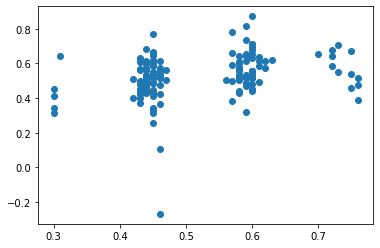

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

sklr = LinearRegression(normalize=False)
sklr.fit(X_train,y_train)

score = sklr.score(X_test,y_test)

preds_test = sklr.predict(X_test)
preds_train = sklr.predict(X_train)



rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))

print("RMSE_test: %f" % (rmse_test))
print("RMSE_train: %f" % (rmse_train))

print ('Score:', score)

r2_score_train = r2_score(y_train, preds_train)
r2_score_test = r2_score(y_test, preds_test)

print("r2_score_train: %f" % (r2_score_train))
print("r2_score_test: %f" % (r2_score_test))
plt.scatter(y_test, preds_test)


 # 4 XG Boost regression (RMSE Calculation)

[12:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE_test: 0.144817
RMSE_train: 0.124234
Score: 0.31985954185574184
r2_score_train: 0.555315
r2_score_test: 0.319860


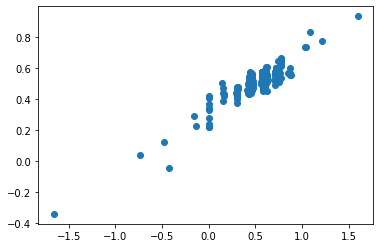

In [41]:

import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

lm=  xg_reg.fit(X_train,y_train)

score = xg_reg.score(X_test,y_test)


preds_test = xg_reg.predict(X_test)
preds_train = xg_reg.predict(X_train)



rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))

print("RMSE_test: %f" % (rmse_test))
print("RMSE_train: %f" % (rmse_train))

print ('Score:', score)

r2_score_train = r2_score(y_train, preds_train)
r2_score_test = r2_score(y_test, preds_test)

print("r2_score_train: %f" % (r2_score_train))
print("r2_score_test: %f" % (r2_score_test))

plt.scatter(y_train,preds_train)



# Lasso 

In [32]:
from sklearn.linear_model import Lasso
skls = Lasso()
lm = skls.fit(X_train,y_train)


score = skls.score(X_test,y_test)


preds_test = skls.predict(X_test)
preds_train = skls.predict(X_train)



rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))

print("RMSE_test: %f" % (rmse_test))
print("RMSE_train: %f" % (rmse_train))

print ('Score:', score)

r2_score_train = r2_score(y_train, preds_train)
r2_score_test = r2_score(y_test, preds_test)

print("r2_score_train: %f" % (r2_score_train))
print("r2_score_test: %f" % (r2_score_test))




RMSE_test: 0.164353
RMSE_train: 0.169319
Score: 0.12397124240153468
r2_score_train: 0.174001
r2_score_test: 0.123971


 # DecisionTreeRegressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
skdt = DecisionTreeRegressor()
lm = skdt.fit(X_train,y_train)

score = skdt.score(X_test,y_test)


preds_test = skdt.predict(X_test)
preds_train = skdt.predict(X_train)



rmse_test = np.sqrt(mean_squared_error(10**y_test, 10**preds_test))
rmse_train = np.sqrt(mean_squared_error(10**y_train, 10**preds_train))

print("RMSE_test: %f" % (rmse_test))
print("RMSE_train: %f" % (rmse_train))

print ('Score:', score)

r2_score_train = r2_score(y_train, preds_train)
r2_score_test = r2_score(y_test, preds_test)

print("r2_score_train: %f" % (r2_score_train))
print("r2_score_test: %f" % (r2_score_test))





RMSE_test: 2.586045
RMSE_train: 0.000000
Score: -0.5841236589693033
r2_score_train: 1.000000
r2_score_test: -0.584124


# Random forest with searchCV


In [34]:
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor

rndf_model = RandomForestRegressor(random_state=33)
par_grid = dict(n_estimators=range(15,100,15),max_depth=range(4,25),min_samples_split=range(60,500,20),min_samples_leaf=range(25,75,15),max_leaf_nodes=range(7,30,2))

scanCV = RandomizedSearchCV(rndf_model,par_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
lm = scanCV.fit(X_train,y_train)

preds_test =scanCV.best_estimator_.predict(X_test)

print('RMSE_test:',np.sqrt(mean_squared_error(10**y_test, 10**preds_test)))

preds_train = scanCV.best_estimator_.predict(X_train)
print('RMSE_train:',np.sqrt(mean_squared_error(10**y_train, 10**preds_train)))

r2_score_train = r2_score(y_train, preds_train)
r2_score_test = r2_score(y_test, preds_test)

print("r2_score_train: %f" % (r2_score_train))
print("r2_score_test: %f" % (r2_score_test))




RMSE_test: 2.468041055132243
RMSE_train: 1.7555951073818745
r2_score_train: 0.292910
r2_score_test: 0.265133


# Predictions on TEST data

In [ ]:
from google.colab import files
uploaded = files.upload()

df_t = pd.read_csv('test.csv')

df_t.head()

Saving test.csv to test (1).csv


,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,x1_t2,x1_t3,x1_t4,x1_t5,x1_t6,x2_t0,x2_t1,x2_t2,x2_t3,x2_t4,x2_t5,x2_t6,x3_t0,x3_t1,x3_t2,x3_t3,x3_t4,x3_t5,x3_t6,x4_t0,x4_t1,x4_t2,x4_t3,x4_t4,x4_t5,x4_t6,x5_t0,x5_t1,x5_t2,x5_t3,...,x49_t2,x49_t3,x49_t4,x49_t5,x49_t6,x50_t0,x50_t1,x50_t2,x50_t3,x50_t4,x50_t5,x50_t6,x51_t0,x51_t1,x51_t2,x51_t3,x51_t4,x51_t5,x51_t6,x52_t0,x52_t1,x52_t2,x52_t3,x52_t4,x52_t5,x52_t6,x53_t0,x53_t1,x53_t2,x53_t3,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6
0,584,738.152456,747.990517,754.681726,750.607263,754.378901,746.444051,750.95,0.740932,0.706801,0.723154,0.723744,0.716378,0.740058,1.376,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.531013,28.256823,28.316151,28.232895,28.210854,25.527715,27.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,750.314288,740.029072,743.596073,742.075970,...,139.852962,78.052360,140.511566,140.75,140.75,15.530733,15.600093,16.042169,16.064495,16.050873,14.62,14.62,855.087122,861.856605,885.925861,893.369500,885.251467,866.57,866.57,684.129784,684.473194,677.796316,679.067686,680.896822,659.85,659.85,87.924252,91.386511,87.684191,91.393546,90.828849,87.2,87.2,1.964234,1.913202,1.599676,1.596884,1.480912,2.03,2.03
1,678,750.304526,751.440356,751.625640,751.040838,749.642800,751.071232,750.95,0.714269,0.707234,0.666824,0.673494,0.736822,0.778918,1.376,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.805719,21.368538,21.688408,21.697643,21.656669,21.902278,27.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,732.939902,718.816436,716.652476,729.130399,...,137.746375,139.857441,96.186213,140.75,140.75,16.553412,16.707685,16.309841,17.363410,17.336537,14.62,14.62,886.904962,900.970138,892.653772,887.733551,847.896550,866.57,866.57,646.015503,648.743174,649.792619,650.349636,665.107940,659.85,659.85,88.135291,89.252321,90.075781,89.955520,90.498723,87.2,87.2,1.631347,1.660712,1.874003,1.939651,2.044686,2.03,2.03
2,728,778.247612,766.210592,773.076177,775.301112,776.258670,766.606237,750.95,0.943009,0.857520,0.827927,0.850126,0.929918,0.786297,1.376,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.799581,21.730315,21.455666,21.810384,21.403640,7.831283,27.9,6.7,6.7,6.7,6.7,6.7,6.7,6.9,758.659606,769.883857,768.920043,773.176669,...,25.057233,143.919175,143.970977,140.75,140.75,16.339534,16.234889,14.008356,13.769286,13.758843,14.62,14.62,886.602579,885.042899,833.304651,855.937760,846.979556,866.57,866.57,620.550728,624.247153,626.729119,629.299988,628.264240,659.85,659.85,91.384072,91.912166,88.442404,88.431589,87.886603,87.2,87.2,1.865880,1.778088,2.307626,2.472161,2.193177,2.03,2.03
3,338,759.227472,758.535754,762.247934,774.868563,754.005989,757.404229,750.95,1.035127,1.049087,1.076066,1.031095,1.017599,1.030247,1.376,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27.297272,26.796315,26.847153,27.028782,27.011051,27.103765,27.9,6.6,6.6,6.6,6.6,6.6,6.6,6.9,747.475924,741.440557,740.967104,745.394099,...,127.225084,1.319278,20.357368,140.75,140.75,13.499511,13.537267,13.965318,11.436131,16.924345,14.62,14.62,884.302627,898.976630,915.418676,920.514648,887.560716,866.57,866.57,692.841677,694.801674,689.087045,698.203893,701.844375,659.85,659.85,86.014749,84.436064,84.314345,85.308653,84.867806,87.2,87.2,1.876135,2.091196,1.835713,1.870825,1.741741,2.03,2.03
4,570,770.473802,768.971055,770.843730,771.960856,768.813193,760.116829,750.95,1.299968,1.374928,1.374079,1.382351,1.284384,1.369515,1.376,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.305133,20.450279,20.196557,20.420533,20.226292,20.351851,27.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,764.077975,763.753649,760.025952,760.180979,...,141.797682,139.252002,126.244026,140.75,140.75,16.047500,15.831022,16.002220,16.050506,16.044590,14.62,14.62,855.680275,872.193249,882.039923,886.855877,876.797866,866.57,866.57,645.826674,647.687304,650.558850,650.322325,650.437337,659.85,659.85,91.535944,90.324499,88.191878,91.113585,88.013675,87.2,87.2,1.893169,2.407545,2.322047,2.082357,2.099017,2.03,2.03


In [ ]:
X = df_t.drop(['Id'],axis='columns')
X.shape
Test_data_predictions = xg_reg.predict(X)

#final_submission['id'] = df12['id']

#final_submission['price'] = pd.DataFrame(10**Test_data_predictions)



submission = pd.DataFrame(Test_data_predictions,index = df_t['Id'],columns = ['y2'])

#print(final_submission2.columns)

submission.to_csv('Submission_Bombay_Hackers.csv')


submission.head()

,y2
Id,
584,0.551162
678,0.464767
728,0.488200
338,0.525598
570,0.357522
